In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import scipy.stats as st
import statsmodels.api as sm
import missingno  as msno
import matplotlib.pyplot as plt

In [22]:
sns.set()
plt.style.use('ggplot')
from IPython.core.pylabtools import figsize
figsize(10, 8)

# Trabalhando com a base de Oiapoque

- ### Vamos conhecer um pouco sobre a base de dados

In [23]:
oiapoque = pd.read_csv('../data/oiapoque.txt')

In [24]:
# dimensão do dataframe
oiapoque.shape

(3144, 20)

In [25]:
# features
oiapoque.columns

Index(['codigo_estacao', 'data', 'hora', 'temp_inst', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

In [26]:
# algumas informações
oiapoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_estacao    3144 non-null   object 
 1   data              3144 non-null   object 
 2   hora              3144 non-null   int64  
 3   temp_inst         3144 non-null   float64
 4   temp_max          3144 non-null   float64
 5   temp_min          3144 non-null   float64
 6   umid_inst         3144 non-null   int64  
 7   umid_max          3144 non-null   int64  
 8   umid_min          3144 non-null   int64  
 9   pto_orvalho_inst  3144 non-null   float64
 10  pto_orvalho_max   3144 non-null   float64
 11  pto_orvalho_min   3144 non-null   float64
 12  pressao           3144 non-null   float64
 13  pressao_max       3144 non-null   float64
 14  pressao_min       3144 non-null   float64
 15  vento_vel         3143 non-null   float64
 16  vento_direcao     3142 non-null   float64


In [27]:
# tabela percentual de dados faltantes
total = oiapoque.isnull().sum().sort_values(ascending=False)
percent = (oiapoque.isnull().sum()/oiapoque.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
missing_data.index.name =' Variaveis numericas'
missing_data.head(20)

,Dados Ausentes,% Percentual
Variaveis numericas,,
vento_rajada,2,0.000636
vento_direcao,2,0.000636
vento_vel,1,0.000318
precipitacao,0,0.000000
umid_max,0,0.000000
data,0,0.000000
hora,0,0.000000
temp_inst,0,0.000000
temp_max,0,0.000000


In [28]:
# 0s 10 valore que mais se repetem na coluna precipitação
oiapoque.precipitacao.value_counts().head(10)

0.0    2527
0.2     182
0.4      72
0.6      54
0.8      38
1.0      26
1.2      19
2.4      14
1.4      14
2.2      14
Name: precipitacao, dtype: int64

In [29]:
# algumas caracteristicas estatisticas
oiapoque.describe()

,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
count,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3143.000000,3142.000000,3142.000000,3144.000000,3144.000000
mean,11.500000,25.367430,25.821501,24.948823,91.631997,93.704517,89.415394,23.750350,24.175318,23.376940,1011.113709,1011.388772,1010.837913,0.974356,111.135901,3.075589,605.612084,0.415776
std,6.923288,2.327578,2.578945,2.065242,11.071819,9.091337,12.847666,1.011939,1.109483,0.976497,1.535141,1.524238,1.519784,0.775646,80.274725,2.322550,849.589963,1.732541
min,0.000000,20.300000,20.400000,20.300000,55.000000,57.000000,48.000000,19.900000,20.400000,19.300000,1005.800000,1006.000000,1005.700000,0.100000,1.000000,0.500000,-3.540000,0.000000
25%,5.750000,23.700000,23.900000,23.500000,86.000000,91.000000,81.000000,23.100000,23.500000,22.800000,1010.000000,1010.300000,1009.700000,0.400000,49.000000,1.100000,-2.300000,0.000000
50%,11.500000,24.700000,25.000000,24.400000,97.000000,98.000000,96.000000,23.800000,24.200000,23.500000,1011.100000,1011.400000,1010.800000,0.700000,95.500000,2.100000,33.835000,0.000000
75%,17.250000,27.000000,27.800000,26.200000,100.000000,100.000000,100.000000,24.500000,25.000000,24.100000,1012.200000,1012.500000,1011.900000,1.400000,144.000000,4.900000,1197.500000,0.000000
max,23.000000,32.300000,32.700000,31.400000,100.000000,100.000000,100.000000,26.600000,27.400000,26.100000,1016.300000,1016.400000,1015.800000,3.900000,360.000000,19.000000,3638.000000,25.800000


In [30]:
# Variaveis numéricas
varNum = oiapoque.select_dtypes(include=[np.number])
varNum.columns

Index(['hora', 'temp_inst', 'temp_max', 'temp_min', 'umid_inst', 'umid_max',
       'umid_min', 'pto_orvalho_inst', 'pto_orvalho_max', 'pto_orvalho_min',
       'pressao', 'pressao_max', 'pressao_min', 'vento_vel', 'vento_direcao',
       'vento_rajada', 'radiacao', 'precipitacao'],
      dtype='object')

In [31]:
# variaveis categoricas
varCat = oiapoque.select_dtypes(include=[np.object])
varCat.columns

Index(['codigo_estacao', 'data'], dtype='object')

In [32]:
# resumindo
print(f'Total de Variaveis Numericas: {varNum.columns.value_counts().sum()}')
print(f'Total de Variaveis Categoricas: {varCat.columns.value_counts().sum()}')

Total de Variaveis Numericas: 18
Total de Variaveis Categoricas: 2


# Visualizando Valores Ausentes

- ### Matriz de Nulidade

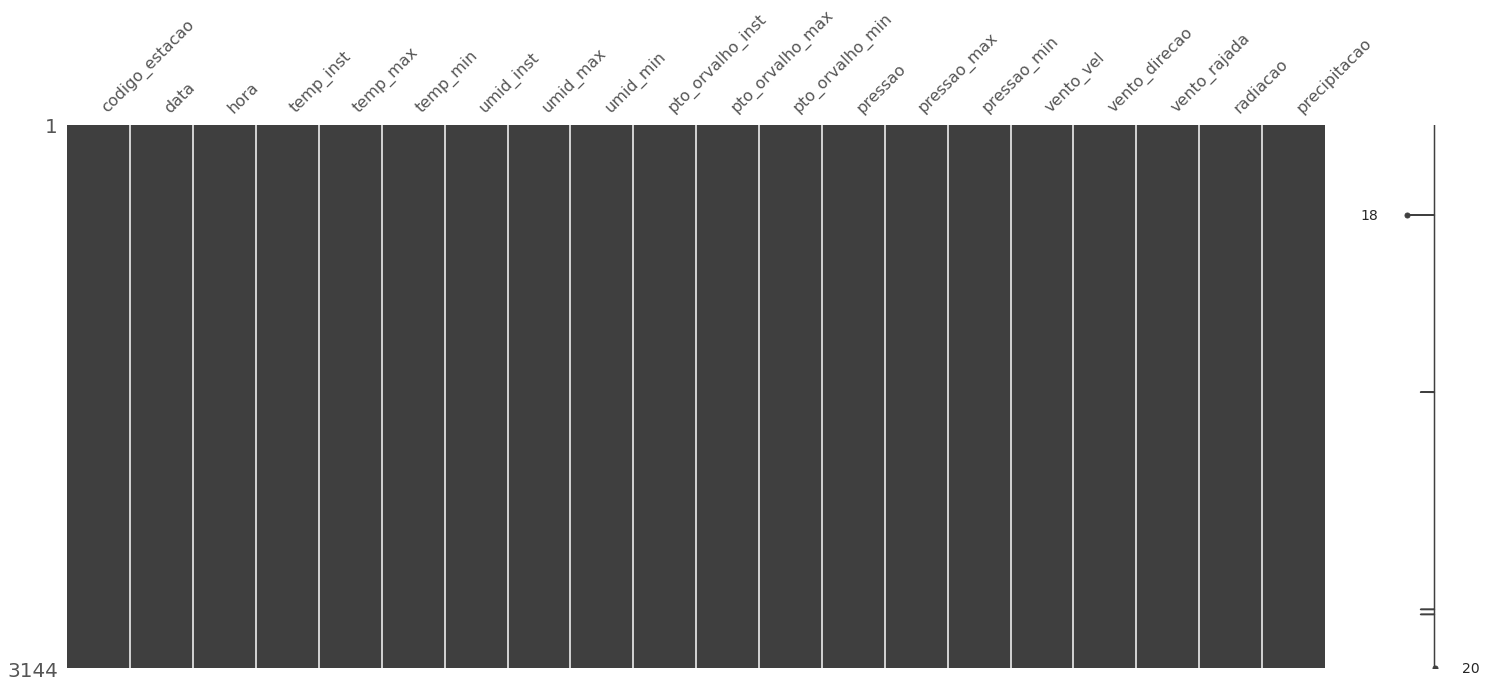

In [33]:
msno.matrix(oiapoque)

- ## HeatMap de Nulidade

Mede a correlação de nulidade: Quão fortemente a presença ou ausência de uma variável afeta a presença de outra:

### Legenda:

- A correlação de nulidade varia de -1 a 0
- correlação de nulidade varia de -1 (se uma variável parece a outra definitivamente não aparece) 
- Se for 0 (variáveis que aparecem ou não aparecem não têm efeito uma sobre a outra)
- Se for 1 (se uma variável aparece, a outra definitivamente também tem influencia sobre a outra)
- As entradas marcadas <1ou > -1 estão com uma correlação próxima de ser exatamente negativa ou 
  positiva. 

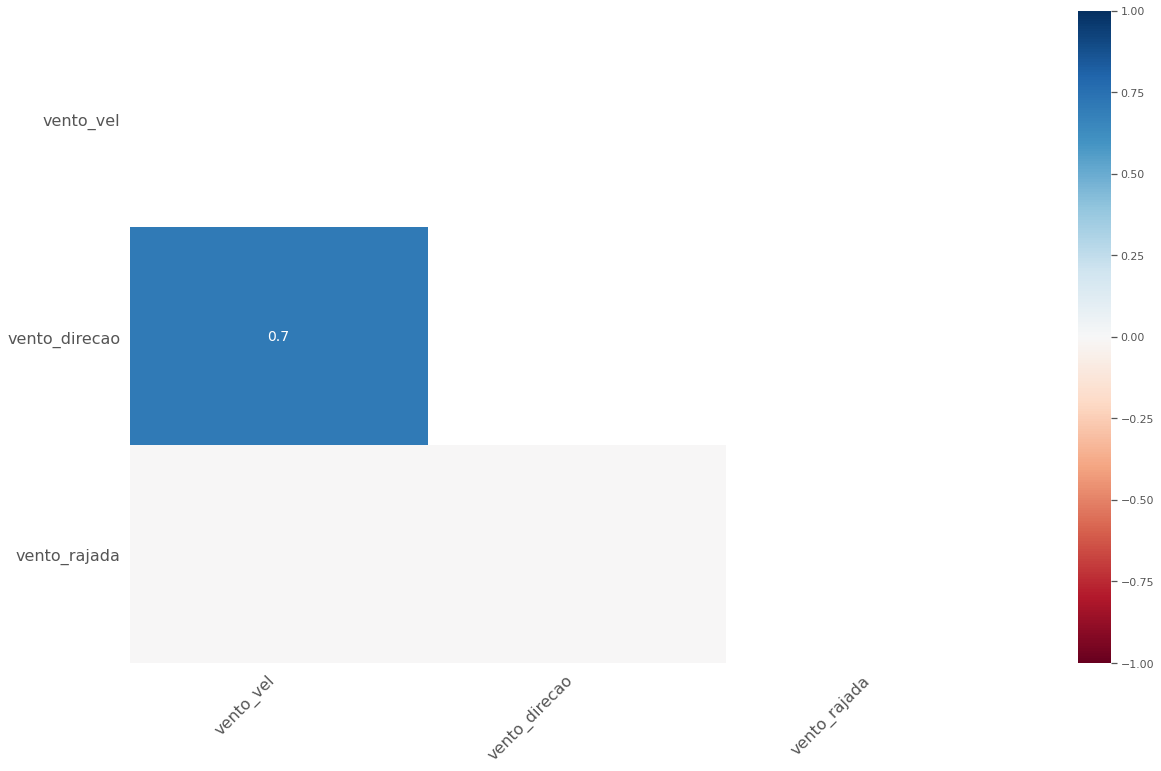

In [34]:
msno.heatmap(oiapoque)

- ## Grafíco de Barras de Nulidade

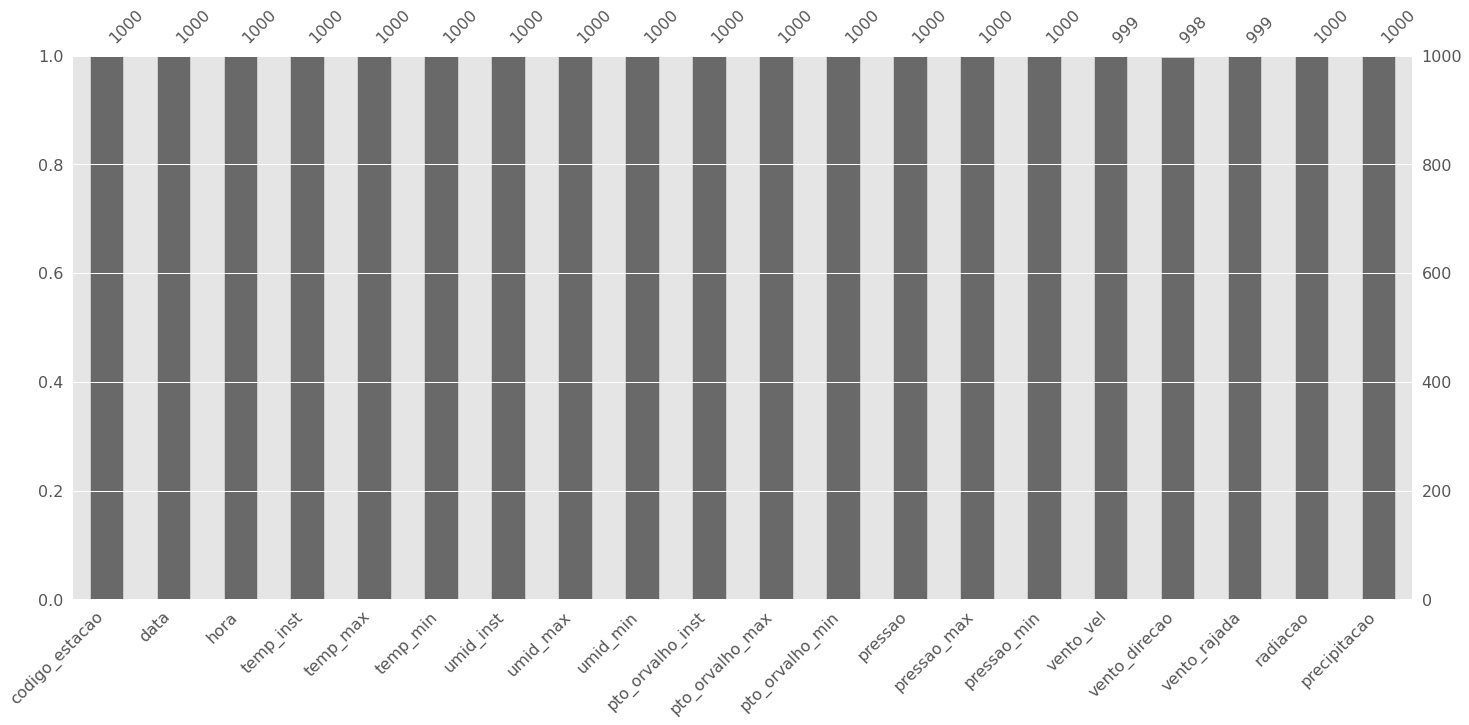

In [35]:
msno.bar(oiapoque.sample(1000))

# Estimando os valores de Skewness e Kurtose

In [36]:
# Estimando Skewness 
oiapoque.skew()

hora                0.000000
temp_inst           0.664240
temp_max            0.596310
temp_min            0.694783
umid_inst          -1.320267
umid_max           -1.635387
umid_min           -1.058011
pto_orvalho_inst   -0.393982
pto_orvalho_max    -0.157640
pto_orvalho_min    -0.644434
pressao             0.093542
pressao_max         0.041343
pressao_min         0.140911
vento_vel           1.248220
vento_direcao       1.191153
vento_rajada        0.933058
radiacao            1.219781
precipitacao        7.445198
dtype: float64

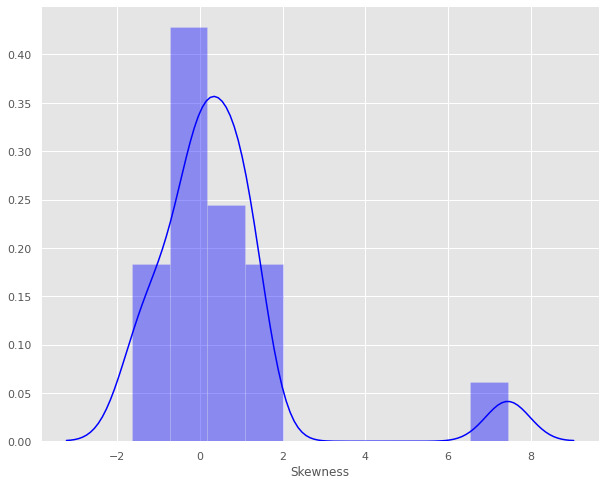

In [37]:
# grafico dos valores de Skewness do dataset
sns.distplot(oiapoque.skew(),color='blue',axlabel ='Skewness')

In [38]:
# Estimando Kurtose
oiapoque.kurt()

hora                -1.204180
temp_inst           -0.372849
temp_max            -0.672397
temp_min            -0.060582
umid_inst            0.637986
umid_max             1.828974
umid_min            -0.135785
pto_orvalho_inst     0.062540
pto_orvalho_max     -0.168900
pto_orvalho_min      0.263765
pressao             -0.196531
pressao_max         -0.188916
pressao_min         -0.159870
vento_vel            0.724086
vento_direcao        1.159220
vento_rajada         0.272231
radiacao             0.284509
precipitacao        72.769119
dtype: float64

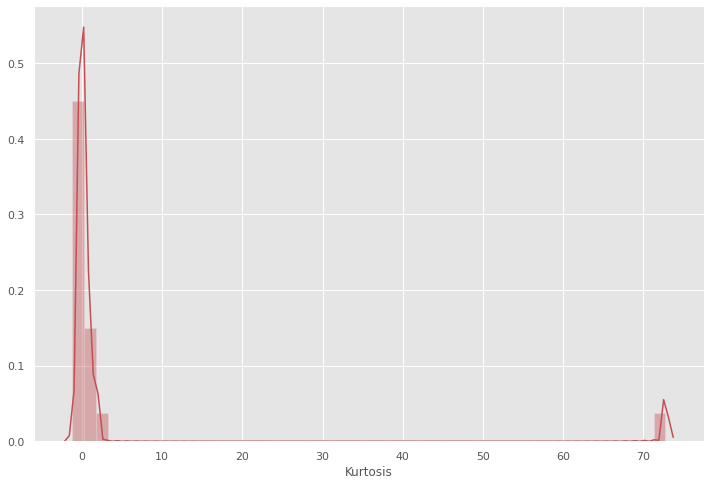

In [39]:
# Comparando a distribuição com e verificando sua Kurtose
plt.figure(figsize = (12,8))
sns.distplot(oiapoque.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

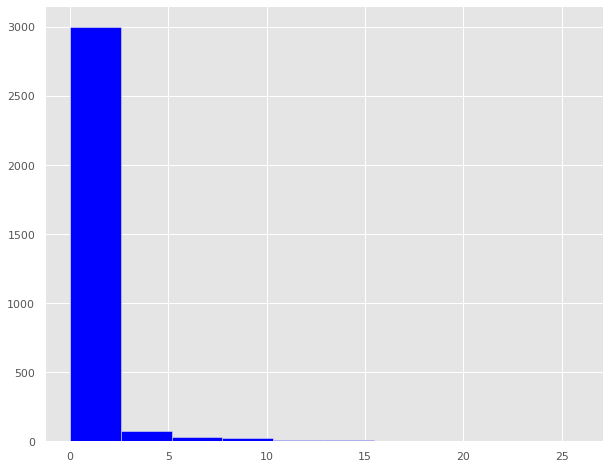

In [40]:
# precipitação
plt.hist(oiapoque['precipitacao'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([  14.,   39.,   67.,   89.,  159.,  125.,  187.,  216.,  366.,
        1882.]),
 array([4.00733319, 4.06711689, 4.12690059, 4.18668429, 4.24646799,
        4.30625169, 4.36603539, 4.42581909, 4.48560279, 4.54538649,
        4.60517019]),
 <a list of 10 Patch objects>)

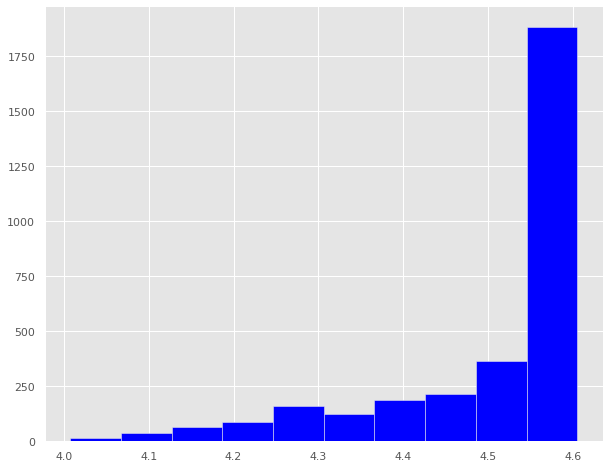

In [41]:
target = np.log(oiapoque['umid_inst'])
target.skew()
plt.hist(target,color='blue')

# Correlação 

- ## Dendrograma

Permite correlacionar mais completamente a conclusão das variáveis, revelando tendências mais profundas do que as pares aos pares visíveis no mapa de calor da correlação:

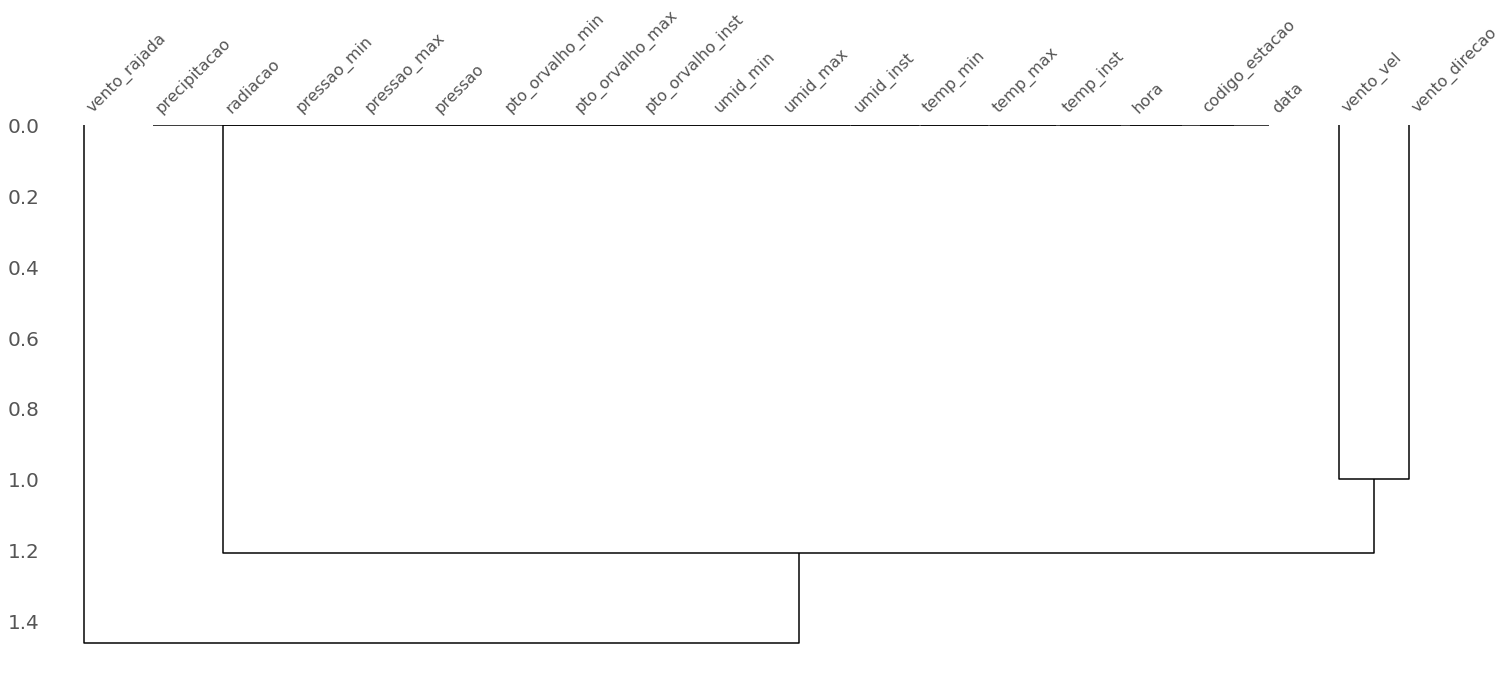

In [42]:
msno.dendrogram(oiapoque)

- ### Matrix de Correlação

In [43]:
corr = oiapoque.corr(method = 'pearson')
corr

,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
hora,1.000000,0.595583,0.644949,0.594250,-0.548396,-0.540653,-0.610376,0.190745,0.357933,-0.006803,-0.314857,-0.294663,-0.317889,0.507875,-0.214756,0.612274,0.459093,0.087173
temp_inst,0.595583,1.000000,0.972567,0.965786,-0.911924,-0.849003,-0.897198,0.282118,0.537735,0.039634,-0.136604,-0.047857,-0.084691,0.745177,-0.279347,0.753394,0.864859,-0.043121
temp_max,0.644949,0.972567,1.000000,0.965284,-0.897745,-0.863110,-0.935234,0.260516,0.523716,0.009978,-0.179262,-0.097462,-0.132406,0.753907,-0.301592,0.805101,0.822624,0.012613
temp_min,0.594250,0.965786,0.965284,1.000000,-0.883587,-0.880972,-0.892807,0.260811,0.499825,0.059172,-0.234732,-0.150602,-0.181456,0.712378,-0.307094,0.740298,0.761947,-0.033898
umid_inst,-0.548396,-0.911924,-0.897745,-0.883587,1.000000,0.954240,0.963835,0.130883,-0.180371,0.339957,0.061125,-0.026183,0.002942,-0.809376,0.337797,-0.767147,-0.852347,0.107823
umid_max,-0.540653,-0.849003,-0.863110,-0.880972,0.954240,1.000000,0.948132,0.187177,-0.065674,0.393455,0.141879,0.063261,0.087968,-0.753988,0.353003,-0.737665,-0.726327,0.101092
umid_min,-0.610376,-0.897198,-0.935234,-0.892807,0.963835,0.948132,1.000000,0.070139,-0.215599,0.322218,0.113458,0.033288,0.061195,-0.792214,0.346896,-0.817895,-0.809002,0.048973
pto_orvalho_inst,0.190745,0.282118,0.260516,0.260811,0.130883,0.187177,0.070139,1.000000,0.896903,0.896958,-0.171506,-0.166886,-0.184718,-0.071580,0.103949,0.059650,0.100398,0.142016
pto_orvalho_max,0.357933,0.537735,0.523716,0.499825,-0.180371,-0.065674,-0.215599,0.896903,1.000000,0.780659,-0.168556,-0.131097,-0.159357,0.217870,0.001301,0.313763,0.395582,0.154190
pto_orvalho_min,-0.006803,0.039634,0.009978,0.059172,0.339957,0.393455,0.322218,0.896958,0.780659,1.000000,-0.172826,-0.189645,-0.193765,-0.236221,0.137937,-0.160736,-0.148546,0.130741


- ### HeatMap Correlação 

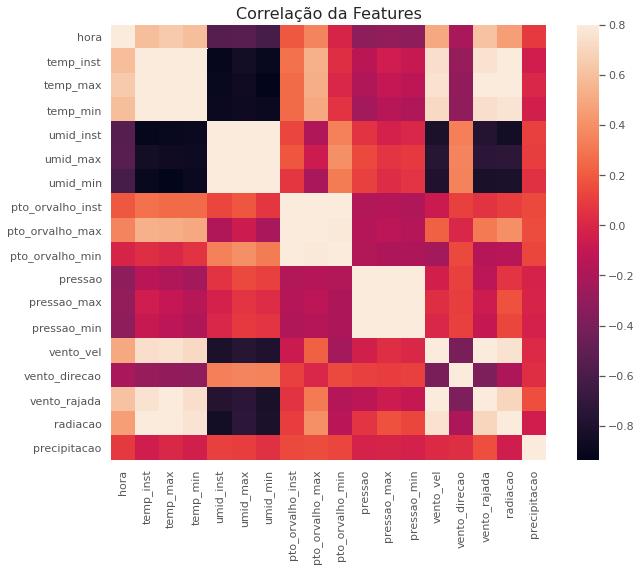

In [44]:
ax = plt.subplots(figsize=(11, 8))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(corr,square = True,  vmax=0.8)

- ### Zoomed HeatMap

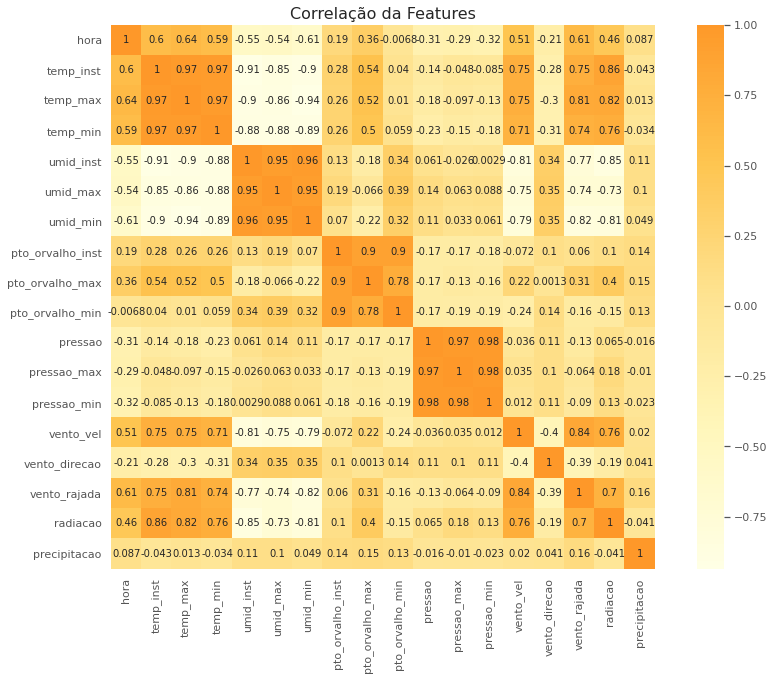

In [45]:
plt.subplots(figsize=(15, 10))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(corr, center=True, square=True, annot=True, cmap="YlOrBr");

- ### Grafícos de Dispersão

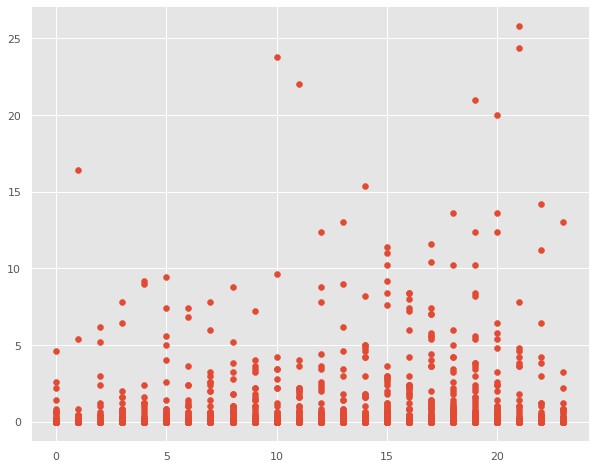

In [46]:
# hora x precipitacao
plt.scatter(oiapoque.hora, oiapoque.precipitacao)

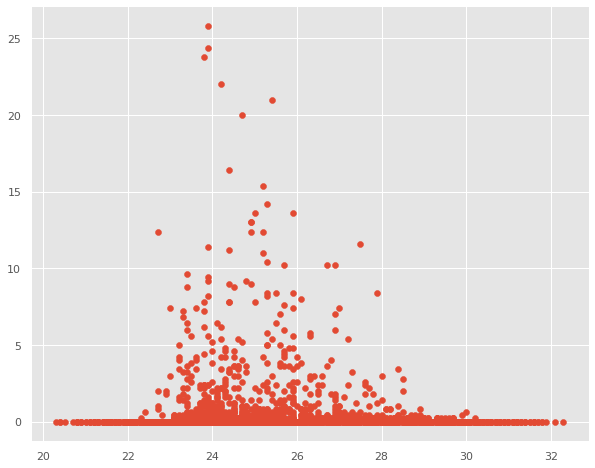

In [47]:
# temperatura no instante x precipitacao

plt.scatter(oiapoque.temp_inst, oiapoque.precipitacao)

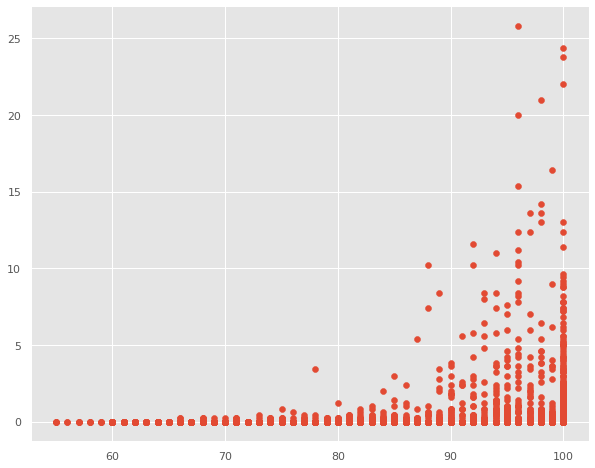

In [48]:
# umidade instante x precipitacao
plt.scatter(oiapoque.umid_inst, oiapoque.precipitacao)

# Verificar Distribuição

- ### Boxplot

In [49]:
oiapoque.columns

Index(['codigo_estacao', 'data', 'hora', 'temp_inst', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

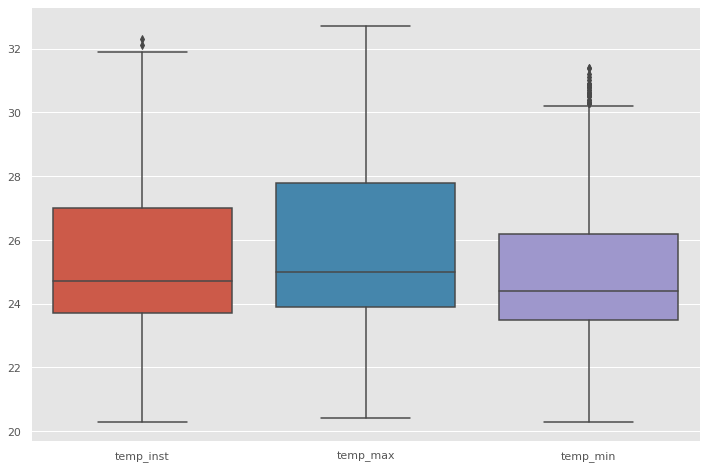

In [50]:
# temperatura
plt.subplots(figsize=(12, 8))

sns.boxplot(data=oiapoque.loc[:, ["temp_inst", "temp_max", "temp_min"]]);

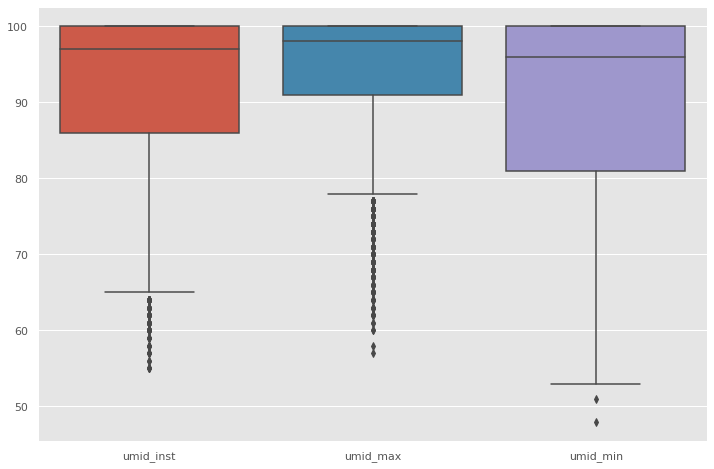

In [51]:
# umidade 
plt.subplots(figsize=(12, 8))

sns.boxplot(data=oiapoque.loc[:, ["umid_inst", "umid_max", "umid_min"]]);

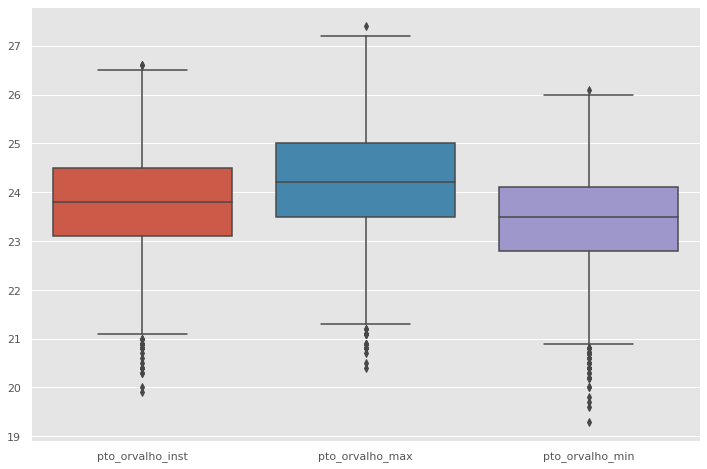

In [52]:
# pt_orvalho (um negocio que ne nem sei o que é)
plt.subplots(figsize=(12, 8))

sns.boxplot(data=oiapoque.loc[:,["pto_orvalho_inst", "pto_orvalho_max", "pto_orvalho_min"]]);

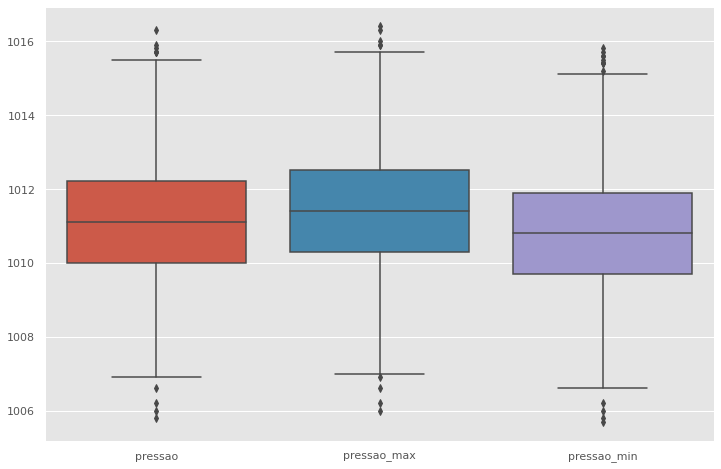

In [53]:
# pressão atmosferica
plt.subplots(figsize=(12, 8))

sns.boxplot(data=oiapoque.loc[:,["pressao", "pressao_max","pressao_min"]]);    

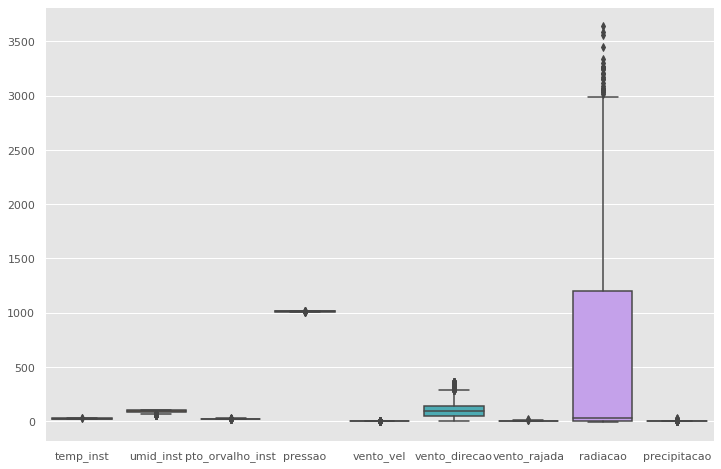

In [54]:
# visão de geral

features = ["temp_inst", "umid_inst", "pto_orvalho_inst",
            "pressao", "vento_vel", "vento_direcao",
            "vento_rajada", "radiacao","precipitacao"]

plt.subplots(figsize=(12, 8))


sns.boxplot(data=oiapoque.loc[:, features]);  

- ### Transformações de Johnson, log Normal e a distribuição Normal

/home/douglas/miniconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))


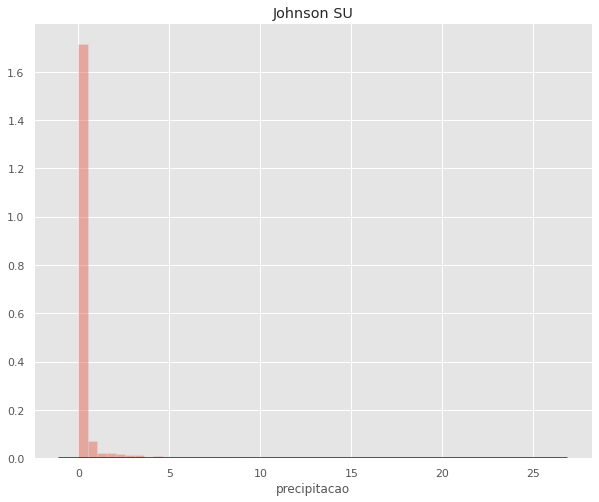

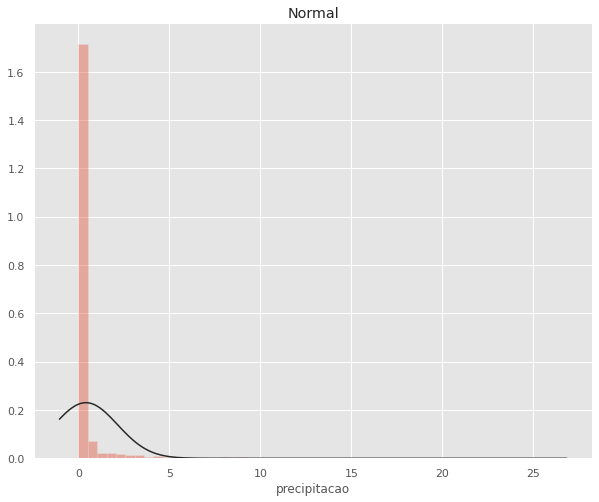

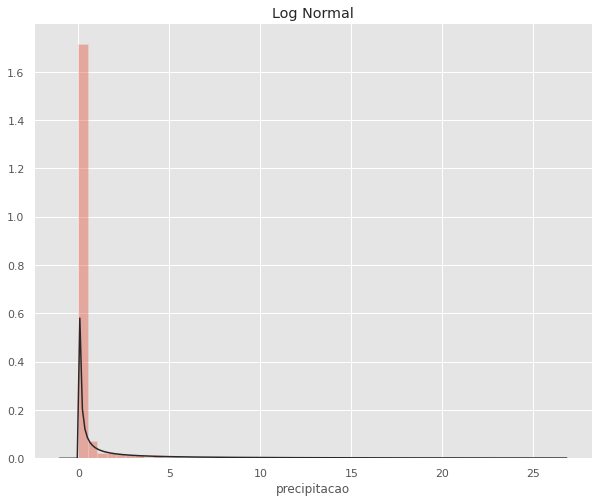

In [55]:
y = oiapoque['precipitacao']

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# Testes de Hipotese
- Função para gerar samples 

In [57]:
def sample(df, col_name, n=100, seed=42):
    np.random.seed(seed)    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    return df.loc[random_idx, col_name]

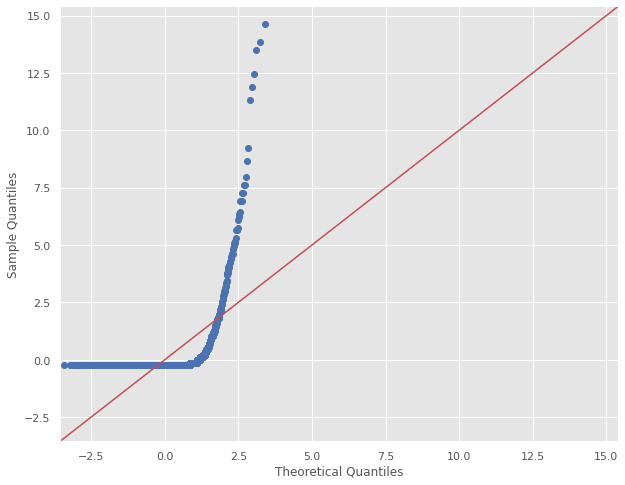

In [59]:
# ggplot de precipitacao do municipio de Porto Grande
sm.qqplot(oiapoque.precipitacao, fit=True, line="45"); 

### Shapiro-Wilk

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade. Nosso intuito é verificar se uma dada amostra veio ou não de uma distribuição normal.

Não precisamos e não entraremos nos detalhes da sua estatística de teste. Tudo que precisamos saber por ora é:

* A hipótese nula, $H_{0}$, é a normalidade dos dados e A hipotese Alternativa, $H_{a}$ é não normalidade
  * Se o valor-p for menor que o nível de significância $\alpha$, então temos evidências de que os dados não vêm de uma distribuição normal.
  * Se o valor-p for maior que $\alpha$, então não podemos afimar que os dados não vêm de uma distribuição normal (o que é sutilmente diferente de afirmar que eles _vêm_ de uma distribuição normal. Cuidado!).
* Apesar de ter tendência a melhores resultados quanto maior a amostra, a maior parte das implementações não suporta computações com amostras muito grandes.
  * A implementação do SciPy por exemplo só suporta até 5000 observações.
* É altamente aconselhado fazer o teste em conjunto com uma análise gráfica de um _q-q plot_.

In [65]:
oia_amostra = sample(oiapoque,'precipitacao',3000) # amostra
teste = st.shapiro(oia_amostra) # teste de shapiro

# resultado
if teste[1] < 0.05:
    print('OIAPOQUE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} menor que Alpha = 0.05')
    print('Ha => Os dados não vem de uma distribuição normal')
else:
    print('OIAPOQUE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} maior que Alpha = 0.05')
    print('H0 => Os dados vem de uma distribuição normal')

OIAPOQUE - AP
--------------------
(0.24920368194580078, 0.0)
P_valor: 0.0 menor que Alpha = 0.05
Ha => Os dados não vem de uma distribuição normal


### Jarque-Bera

Assim como Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal com $H_{0}$ sendo a normalidade dos dados. A diferença reside na estatística de teste utilizada.

A estatística de teste é baseada na assimetria (_skewness_) e curtose (_kurtosis_) excessiva da amostra. Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero. Se isso acontecer, então a estatística de teste tem distribuição $\chi^{2}$ com dois graus de liberdade.

No entanto, se a amostra for pequena, podemos ter muitos falsos negativos (Erro Tipo I) ao utilizarmos a distribuição $\chi^{2}$, ou seja, rejeitamos $H_{0}$ quando ela é verdadeira.

Para evitar isso, as implementações costumam utilizar aproximações por Monte-Carlo quando $n$ é pequeno, reservando a aproximação $\chi^{2}$ para amostras grandes.

Novamente, é altamente aconselhado complementar o resultado desse teste com um _q-q plot_.

In [62]:
oia_amostra = sample(oiapoque,'precipitacao',3000) # amostra
teste = st.jarque_bera(oia_amostra) # teste de shapiro

# resultado
if teste[1] < 0.05:
    print('OIAPOQUE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} menor que Alpha = 0.05')
    print('Ha => Os dados não vem de uma distribuição normal')
else:
    print('OIAPOQUE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} maior que Alpha = 0.05')
    print('H0 => Os dados vem de uma distribuição normal')


OIAPOQUE - AP
--------------------
(717395.8707180631, 0.0)
P_valor: 0.0 menor que Alpha = 0.05
Ha => Os dados não vem de uma distribuição normal
